# Multi-Class Classification of COVID-19 X-rays via Transfer Learning

Classes: COVID-Pneumonia,

Architectures: DenseNet169, VGG-16

## Data

File structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>

Note: Notebook outfitted for Colab

## Multi-class Classification

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.8.0'

In [4]:
# Mounting Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load Image Data

In [5]:
DATA_LIST = os.chdir("/content/drive/MyDrive/Challenge/Covid_Data_GradientCrescent/all/train")
DATASET_PATH  = "/content/drive/MyDrive/Challenge/Covid_Data_GradientCrescent/all/train"
TEST_DIR =  '/content/drive/MyDrive/Challenge/Covid_Data_GradientCrescent/all/test'

# Input Parameters + Hyperparameters
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = 4
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 100
LEARNING_RATE = 0.0001 # start off with high rate first 0.001 and experiment with reducing it gradually 
LEARNING_RATE2 = 0.0001

print('done')

done


#### Generate Training and Validation Batches

In [6]:
train_datagen = ImageDataGenerator(rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')

# Train + Validation Datasets for VGG16


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

# Train + Validation Datasets for DenseNet

train_batches2 = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches2 = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.
Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


## **1. VGG16-based vs DenseNet-based model**

#### Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [ ]:
# Loading in pre-trained VGG16 network

from keras.applications.vgg16 import VGG16


base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_batches[0][0][0].shape)
base_model.trainable = False ## Not trainable weights
base_model.summary()

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [7]:
# Loading in pre-trained EfficientNetV2 network

from keras.applications.densenet import DenseNet169

base_model2 = DenseNet169(include_top=False, weights='imagenet', input_shape=train_batches[0][0][0].shape)
base_model2.trainable = True
base_model2.summary()

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


51888128/51877672 [==============================] - 0s 0us/step
Model: "densenet169"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                       

In [ ]:
# Preprocessing Input Datasets for VGG16

from keras.applications.vgg16 import preprocess_input

for batchNo in np.arange(10):
    for imgNo in np.arange(10):
        if train_batches[batchNo][0][imgNo] is not None:
            train_batches[batchNo][0][imgNo] = preprocess_input(train_batches[batchNo][0][imgNo])
            
for batchNo in np.arange(3):
    if batchNo != 2:
        for imgNo in np.arange(10):
            if valid_batches[batchNo][0][imgNo] is None:
                break
            else:
                valid_batches[batchNo][0][imgNo] = preprocess_input(valid_batches[batchNo][0][imgNo])
    else:
        for imgNo in np.arange(6):
            valid_batches[batchNo][0][imgNo] = preprocess_input(valid_batches[batchNo][0][imgNo])
    
print('done preprocessing')

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


done preprocessing


In [ ]:
# Pre-processing for DenseNet

from keras.applications.densenet import preprocess_input

for batchNo in np.arange(10):
    for imgNo in np.arange(10):
        if train_batches2[batchNo][0][imgNo] is not None:
            train_batches2[batchNo][0][imgNo] = preprocess_input(train_batches2[batchNo][0][imgNo])
            
for batchNo in np.arange(3):
    if batchNo != 2:
        for imgNo in np.arange(10):
            if valid_batches2[batchNo][0][imgNo] is None:
                break
            else:
                valid_batches2[batchNo][0][imgNo] = preprocess_input(valid_batches2[batchNo][0][imgNo])
    else:
        for imgNo in np.arange(6):
            valid_batches2[batchNo][0][imgNo] = preprocess_input(valid_batches2[batchNo][0][imgNo])
    
print('done preprocessing')

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


done preprocessing


In [ ]:
# Building on top of VGG16-based model 

from keras import layers, models

flatten1 = layers.Flatten()
dense1 = layers.Dense(256, activation='sigmoid')
predL = layers.Dense(4, activation='sigmoid')
batchNorm = layers.BatchNormalization()


model = models.Sequential([
    

    base_model,
    flatten1,
    batchNorm,
    dense1,
    predL
])

model.summary()  

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 batch_normalization_1 (Batc  (None, 25088)            100352    
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 256)               6422784   
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21,238,852
Trainable params: 6,473,988
Non-trainable params: 14,764,864
__________________________________

#### Train Model

In [8]:
# Building on top of ResNet-based model
from keras import layers, models

dense2 = layers.Dense(256, activation='sigmoid')
predL2 = layers.Dense(4, activation='sigmoid')
batchNorm2 = layers.BatchNormalization()
flatten2 = layers.Flatten()
maxPool2 = layers.MaxPooling3D(pool_size=7)
globalMax2 = layers.GlobalMaxPooling3D()
reshape2 = layers.Reshape((1, 7, 7, 2048))

model2 = models.Sequential([
                            

    base_model2,
    flatten2,
    batchNorm2,
    dense2,
    predL2

])

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 flatten_1 (Flatten)         (None, 81536)             0         
                                                                 
 batch_normalization_1 (Batc  (None, 81536)            326144    
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 256)               20873472  
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 33,843,524
Trainable params: 33,522,052
Non-trainable params: 321,472
______________________________________

In [ ]:
# Training VGG16-based Model

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size


# from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

opt = optimizers.Adam(learning_rate=LEARNING_RATE)

model.compile(
    optimizer=opt,
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)


# es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5,  restore_best_weights=True)

history = model.fit(train_batches, epochs=NUM_EPOCHS, validation_data=valid_batches, batch_size=BATCH_SIZE, steps_per_epoch=STEP_SIZE_TRAIN, validation_steps = STEP_SIZE_VALID)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


21/21 [==============================] - 10s 416ms/step - loss: 1.3517 - accuracy: 0.3932 - val_loss: 1.8335 - val_accuracy: 0.4600
Epoch 2/100
21/21 [==============================] - 7s 350ms/step - loss: 1.0546 - accuracy: 0.5971 - val_loss: 1.6726 - val_accuracy: 0.4800
Epoch 3/100
21/21 [==============================] - 7s 351ms/step - loss: 0.8316 - accuracy: 0.6845 - val_loss: 1.1939 - val_accuracy: 0.5200
Epoch 4/100
21/21 [==============================] - 7s 352ms/step - loss: 0.7583 - accuracy: 0.6942 - val_loss: 1.1894 - val_accuracy: 0.5600
Epoch 5/100
21/21 [==============================] - 7s 350ms/step - loss: 0.7704 - accuracy: 0.6893 - val_loss: 0.8967 - val_accuracy: 0.6000
Epoch 6/100
21/21 [==============================] - 7s 351ms/step - loss: 0.7007 - accuracy: 0.7427 - val_loss: 0.8459 - val_accuracy: 0.6200
Epoch 7/100
21/21 [==============================] - 7s 351ms/step - loss: 0.6982 - accuracy: 0.6699 - val_loss: 0.9094 - val_accuracy: 0.6600
Epoch 8/10

In [ ]:
# Training EN-based Model

STEP_SIZE_TRAIN=train_batches2.n//train_batches2.batch_size
STEP_SIZE_VALID=valid_batches2.n//valid_batches2.batch_size

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

LEARNING_RATE = 0.0001

opt2 = optimizers.Adam(learning_rate=LEARNING_RATE)

model2.compile(
    optimizer=opt2,
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)


# es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)


historyEN = model2.fit(train_batches2, epochs=NUM_EPOCHS, validation_data=valid_batches2, batch_size=BATCH_SIZE, steps_per_epoch=STEP_SIZE_TRAIN, validation_steps = STEP_SIZE_VALID)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


21/21 [==============================] - 67s 2s/step - loss: 1.8806 - accuracy: 0.5146 - val_loss: 2.4409 - val_accuracy: 0.2400
Epoch 2/100
21/21 [==============================] - 8s 396ms/step - loss: 1.2531 - accuracy: 0.6117 - val_loss: 2.2246 - val_accuracy: 0.2200
Epoch 3/100
21/21 [==============================] - 8s 379ms/step - loss: 1.0989 - accuracy: 0.6845 - val_loss: 1.8593 - val_accuracy: 0.2400
Epoch 4/100
21/21 [==============================] - 8s 368ms/step - loss: 0.8692 - accuracy: 0.6942 - val_loss: 1.4433 - val_accuracy: 0.2600
Epoch 5/100
21/21 [==============================] - 8s 373ms/step - loss: 0.7724 - accuracy: 0.7282 - val_loss: 1.0989 - val_accuracy: 0.4600
Epoch 6/100
21/21 [==============================] - 8s 377ms/step - loss: 0.6479 - accuracy: 0.7039 - val_loss: 0.8371 - val_accuracy: 0.6800
Epoch 7/100
21/21 [==============================] - 8s 378ms/step - loss: 0.6578 - accuracy: 0.7233 - val_loss: 0.7799 - val_accuracy: 0.8000
Epoch 8/100
2

#### [5 points] Plot Accuracy and Loss During Training

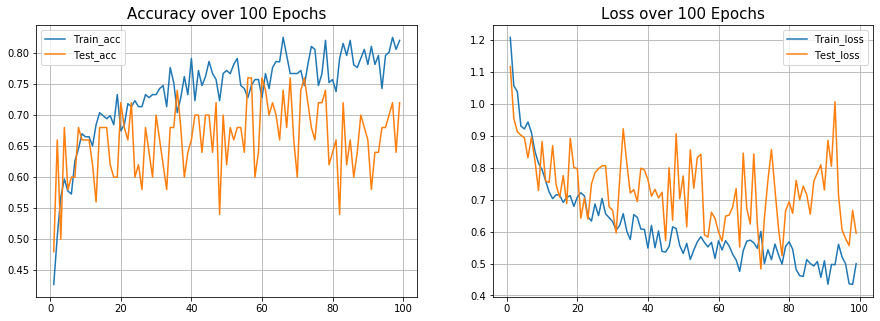

In [ ]:
# Sample Plots

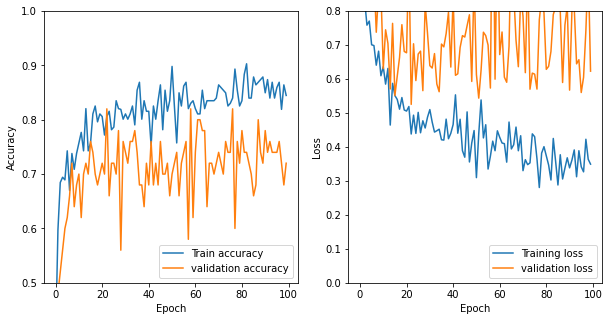

In [ ]:
# VGG16-based model Metrics

import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

ax = plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.8])
plt.legend(loc='lower right')

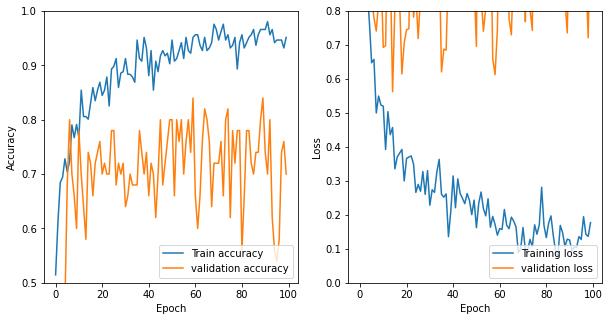

In [ ]:
# EN-based model Metrics

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(1,2,1)
plt.plot(historyEN.history['accuracy'], label='Train accuracy')
plt.plot(historyEN.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

ax = plt.subplot(1,2,2)
plt.plot(historyEN.history['loss'], label='Training loss')
plt.plot(historyEN.history['val_loss'], label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.8])
plt.legend(loc='lower right')

#### Testing Model

In [ ]:
# Sample Metrics

Found 36 images belonging to 4 classes.
36
  ...
    to  
  ['...']
36/36 [==============================] - 10s 274ms/step - loss: 0.7570 - acc: 0.6944
Test loss: 0.757028494571235
Test accuracy: 0.6944444


In [ ]:
# VGG16-based model test evaluation

from keras.applications.vgg16 import preprocess_input

test_datagen = ImageDataGenerator()

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
for img in np.arange(36):
  eval_generator[img][0][0] = preprocess_input(eval_generator[img][0][0])

eval_generator.reset()
print(len(eval_generator))
x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  from ipykernel import kernelapp as app


36/36 [==============================] - 2s 24ms/step - loss: 1.0653 - accuracy: 0.6944
Test loss: 1.0652629137039185
Test accuracy: 0.6944444179534912


In [ ]:
# EN-based model test evalution

test_datagen = ImageDataGenerator()

eval_generator2 = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator2.reset()
print(len(eval_generator2))
xEN = model2.evaluate_generator(eval_generator2,steps = np.ceil(len(eval_generator2)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , xEN[0])
print('Test accuracy:',xEN[1])

Found 36 images belonging to 4 classes.
36


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


36/36 [==============================] - 9s 216ms/step - loss: 0.6996 - accuracy: 0.7778
Test loss: 0.6996490359306335
Test accuracy: 0.7777777910232544


### TSNE Plot

Using t-SNE to reduce the dimensionality of extracted features to 2 dimensions and plot the resulting 2D features.

**VGG-16 t-SNE**

In [ ]:
from sklearn.manifold import TSNE

intermediate_layer_model = models.Model(inputs=model.input,
                                        outputs=model.get_layer('dense_2').output)

tsne_eval_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")


# Converting data to arrays

imgs1 = np.zeros([130, 224, 224, 3]) # Figure out how many images there are here
labels1 = np.zeros([130, 4])
count = 0

print('Data Prep')

for img, label in tsne_eval_generator:
    if count == 130:
        break
    imgs1[count] = img
    labels1[count,:] = label
    count+= 1
    
print('TSNE Running')

features = intermediate_layer_model.predict(imgs1)
tsne = TSNE(n_components=2).fit_transform(features)

print('TSNE Done')

tx = tsne[:, 0]
ty = tsne[:, 1]

Found 270 images belonging to 4 classes.
Data Prep
TSNE Running


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


TSNE Done


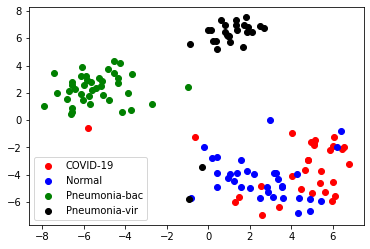

In [ ]:
# Plotting t-SNE (2 Components)

colors = ['red', 'blue', 'green', 'black']

fig = plt.figure()
ax = fig.add_subplot(111)

COVIDX = []
COVIDY = []
NormalX = []
NormalY = []
Pneumonia_BacterialX = []
Pneumonia_BacterialY = []
Pneumonia_ViralX = []
Pneumonia_ViralY = []


for i in np.arange(labels1.shape[0]):
    if labels1[i,-1] == 1.:
        COVIDX.append(tx[i])
        COVIDY.append(ty[i])
    elif labels1[i,-2] == 1.:
        NormalX.append(tx[i])
        NormalY.append(ty[i])
    elif labels1[i,1] == 1.:
        Pneumonia_BacterialX.append(tx[i])
        Pneumonia_BacterialY.append(ty[i])
    else:
        Pneumonia_ViralX.append(tx[i])
        Pneumonia_ViralY.append(ty[i])
        
ax.scatter(COVIDX, COVIDY, c='red', label='COVID-19')
ax.scatter(NormalX, NormalY, c='blue', label = 'Normal')
ax.scatter(Pneumonia_BacterialX, Pneumonia_BacterialY, c='green', label='Pneumonia-bac')
ax.scatter(Pneumonia_ViralX, Pneumonia_ViralY, c='black', label='Pneumonia-vir')


ax.legend(loc='best') 
plt.show()

 DenseNet t-SNE 

In [ ]:
from sklearn.manifold import TSNE

intermediate_layer_model2 = models.Model(inputs=model2.input,
                                        outputs=model2.get_layer('dense').output)

tsne_eval_generator2 = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")


# Converting data to arrays

imgs2 = np.zeros([130, 224, 224, 3]) # Figure out how many images there are here
labels2 = np.zeros([130, 4])
count = 0

print('Data Prep')

for img, label in tsne_eval_generator2:
    if count == 130:
        break
    imgs2[count] = img
    labels2[count,:] = label
    count+= 1
    
print('TSNE Running')

features2 = intermediate_layer_model2.predict(imgs2)
tsne = TSNE(n_components=2).fit_transform(features2)

print('TSNE Done')

tx2 = tsne[:, 0]
ty2 = tsne[:, 1]

Found 270 images belonging to 4 classes.
Data Prep
TSNE Running


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


TSNE Done


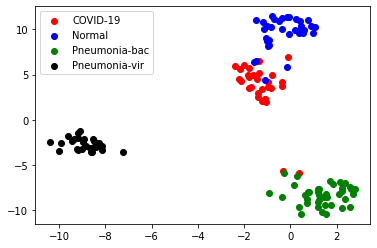

In [ ]:
# Plotting t-SNE (2 Components)

colors = ['red', 'blue', 'green', 'black']

fig = plt.figure()
ax = fig.add_subplot(111)

COVIDX = []
COVIDY = []
NormalX = []
NormalY = []
Pneumonia_BacterialX = []
Pneumonia_BacterialY = []
Pneumonia_ViralX = []
Pneumonia_ViralY = []


for i in np.arange(labels2.shape[0]):
    if labels2[i,-1] == 1.:
        COVIDX.append(tx2[i])
        COVIDY.append(ty2[i])
    elif labels2[i,-2] == 1.:
        NormalX.append(tx2[i])
        NormalY.append(ty2[i])
    elif labels2[i,1] == 1.:
        Pneumonia_BacterialX.append(tx2[i])
        Pneumonia_BacterialY.append(ty2[i])
    else:
        Pneumonia_ViralX.append(tx2[i])
        Pneumonia_ViralY.append(ty2[i])
        
ax.scatter(COVIDX, COVIDY, c='red', label='COVID-19')
ax.scatter(NormalX, NormalY, c='blue', label = 'Normal')
ax.scatter(Pneumonia_BacterialX, Pneumonia_BacterialY, c='green', label='Pneumonia-bac')
ax.scatter(Pneumonia_ViralX, Pneumonia_ViralY, c='black', label='Pneumonia-vir')


ax.legend(loc='best')
plt.show()

<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->